# Okavango_Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.patches as patches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from hydroeval import evaluator, nse, rmse, pbias
from pyemu.pst.pst_utils import SFMT,IFMT,FFMT

flopy is installed in C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\flopy


# Set Path

In [45]:
from swatmf_pkgs import swatmf_viz
import itertools

In [46]:
wd = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models"
sub_number = 240
start_date = '1/1/2020'
obd_nam = '240'

# Streamflow

In [47]:
scn_df = swatmf_viz.all_strs(wd, sub_number, start_date, obd_nam, time_step='M')

Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenar

In [48]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 6],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
base_df = df.drop('filter', axis=1)
cbase_df = base_df['1/1/2019':'12/31/2019']

In [49]:
scn_df = scn_df.iloc[:, :8]

In [50]:
s245_min = scn_df.iloc[:, :4].min(axis = 1)
s245_max = scn_df.iloc[:, :4].max(axis = 1)
s585_min = scn_df.iloc[:, 4:].min(axis = 1)
s585_max = scn_df.iloc[:, 4:].max(axis = 1)


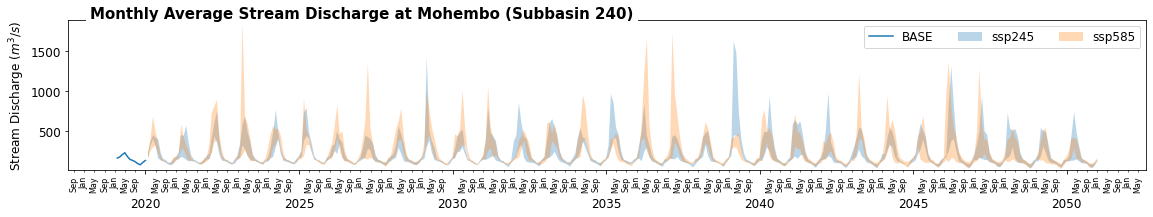

In [51]:
f, ax = plt.subplots(figsize=(16, 3))
# marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(cbase_df.index, cbase_df, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()


years = mdates.YearLocator(5)
months = mdates.MonthLocator(interval=4)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label


ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.margins(y=0.01)
ax.set_title(
    'Monthly Average Stream Discharge at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
f.tight_layout()
plt.savefig(os.path.join(wd, 'projected_str_mohembo.png'), dpi=300, bbox_inches="tight")
plt.show()

# Get monthly group

In [52]:
tot_df = pd.concat([base_df, scn_df], axis=1)

In [53]:
xlabels = ['BASE']+[x[5:-8] for x in tot_df.columns[1:]]
xlabels

['BASE',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

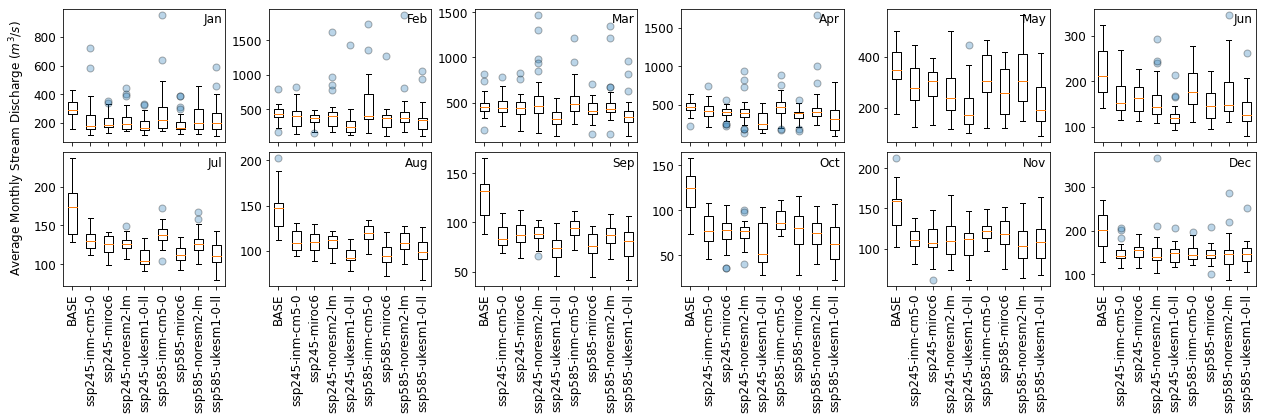

In [55]:
# Boxplot
f, axes = plt.subplots(2, 6, figsize=(18,6), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    data = [df_m[i].dropna() for i in df_m.columns]
    # df_m = df_m.dropna(ax)
    
    ax.boxplot(data, flierprops=flierprops)
    
    
    # ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    # ax.set_xticklabels(df_m.keys(), rotation=90)
    ax.set_xticklabels(xlabels, rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='right',
        x=0.98,
        y=0.85,
        fontsize=12
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Stream Discharge $(m^3/s)$', fontsize=12, labelpad=20)
plt.tight_layout()
plt.savefig(os.path.join(wd, 'projected_mstr.png'), dpi=300, bbox_inches="tight")
plt.show()

In [107]:
wd

'D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\scn_models'

# Sediment

In [16]:
scn_df = swatmf_viz.all_seds(wd, sub_number, start_date, obd_nam, time_step='M')

Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp245-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-inm-cm5-0
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-miroc6
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-noresm2-lm
Folder changed to D:\Projects\Watersheds\Okavango\scenarios\okvg_swatmf_scn_climates\scn_models\base_ssp585-ukesm1-0-ll
Folder changed to D:\Projects\Watersheds\Okavango\scenar

In [17]:
wd_base = "D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base"
# Create data with parameter change
df_rch = pd.read_csv(
                    os.path.join(wd_base, "output.rch"),
                    delim_whitespace=True,
                    skiprows=9,
                    usecols=[1, 3, 10],
                    names=["date", "filter", "streamflow_sim"],
                    index_col=0)

df = df_rch.loc[sub_number]
df = df[df["filter"] < 13]
df.index = pd.date_range('1/1/2003', periods=len(df.streamflow_sim), freq="M")
df.rename(columns = {'streamflow_sim':'base_{}'.format(sub_number)}, inplace = True)
base_df = df.drop('filter', axis=1)
cbase_df = base_df['1/1/2019':'12/31/2019']

In [18]:
scn_df = scn_df.iloc[:, :8]
s245_min = scn_df.iloc[:, :4].min(axis = 1)
s245_max = scn_df.iloc[:, :4].max(axis = 1)
s585_min = scn_df.iloc[:, 4:].min(axis = 1)
s585_max = scn_df.iloc[:, 4:].max(axis = 1)

In [20]:
from matplotlib.ticker import FuncFormatter
from swatmf_pkgs.swatmf_viz import y_fmt

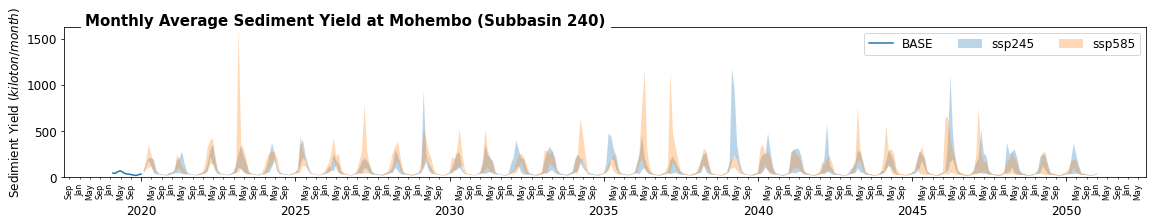

In [41]:
f, ax = plt.subplots(figsize=(16, 3))
# marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
# for i in range(len(scn_df.columns)):
#     ax.plot(scn_df.index, scn_df.iloc[:, i], marker = next(marker), label=scn_df.columns[i])
ax.fill_between(scn_df.index, s245_min/(1e3), s245_max/(1e3), alpha=0.3, label='ssp245')
ax.fill_between(scn_df.index, s585_min/(1e3), s585_max/(1e3), alpha=0.3, label='ssp585')
ax.plot(cbase_df.index, cbase_df/(1e3), label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()


years = mdates.YearLocator(5)
months = mdates.MonthLocator(interval=4)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label

# ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.margins(y=0.01)
ax.set_title(
    'Monthly Average Sediment Yield at Mohembo (Subbasin 240)',
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
ax.set_ylabel(r'Sedimient Yield $(kiloton/month)$', fontsize = 12)
f.tight_layout()
plt.savefig(os.path.join(wd, 'projected_sed_mohembo.png'), dpi=300, bbox_inches="tight")
plt.show()

In [34]:
tot_df = pd.concat([base_df, scn_df], axis=1)
xlabels = ['BASE']+[x[5:-8] for x in tot_df.columns[1:]]
xlabels

['BASE',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

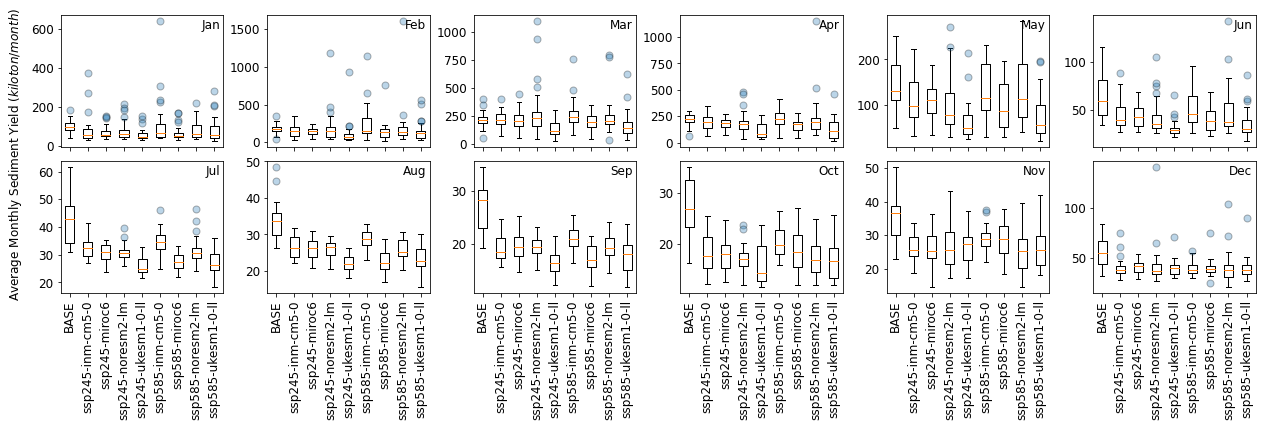

In [44]:
# Boxplot
f, axes = plt.subplots(2, 6, figsize=(18,6), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    data = [df_m[i].dropna()/(1e3) for i in df_m.columns]
    # df_m = df_m.dropna(ax)
    
    ax.boxplot(data, flierprops=flierprops)
    
    
    # ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    # ax.set_xticklabels(df_m.keys(), rotation=90)
    ax.set_xticklabels(xlabels, rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='right',
        x=0.98,
        y=0.85,
        fontsize=12
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Sediment Yield $(kiloton/month)$', fontsize=12, labelpad=20)
plt.tight_layout()
plt.savefig(os.path.join(wd, 'projected_msed.png'), dpi=300, bbox_inches="tight")
plt.show()